In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading data

In [2]:
company_files=pd.read_csv("C:\\Users\\JOTHISH N\\Desktop\\DS\\RANDOM FOREST\\Company_Data.csv")

In [3]:
company_files

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


### Checking for null values in the data

In [4]:
company_files.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


There are no null values in the data

### Checking for duplicate values

In [5]:
company_files[company_files.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


There are no duplicate values

In [6]:
# Distributions of the numerical features in the data¶

<AxesSubplot:xlabel='Education', ylabel='Density'>

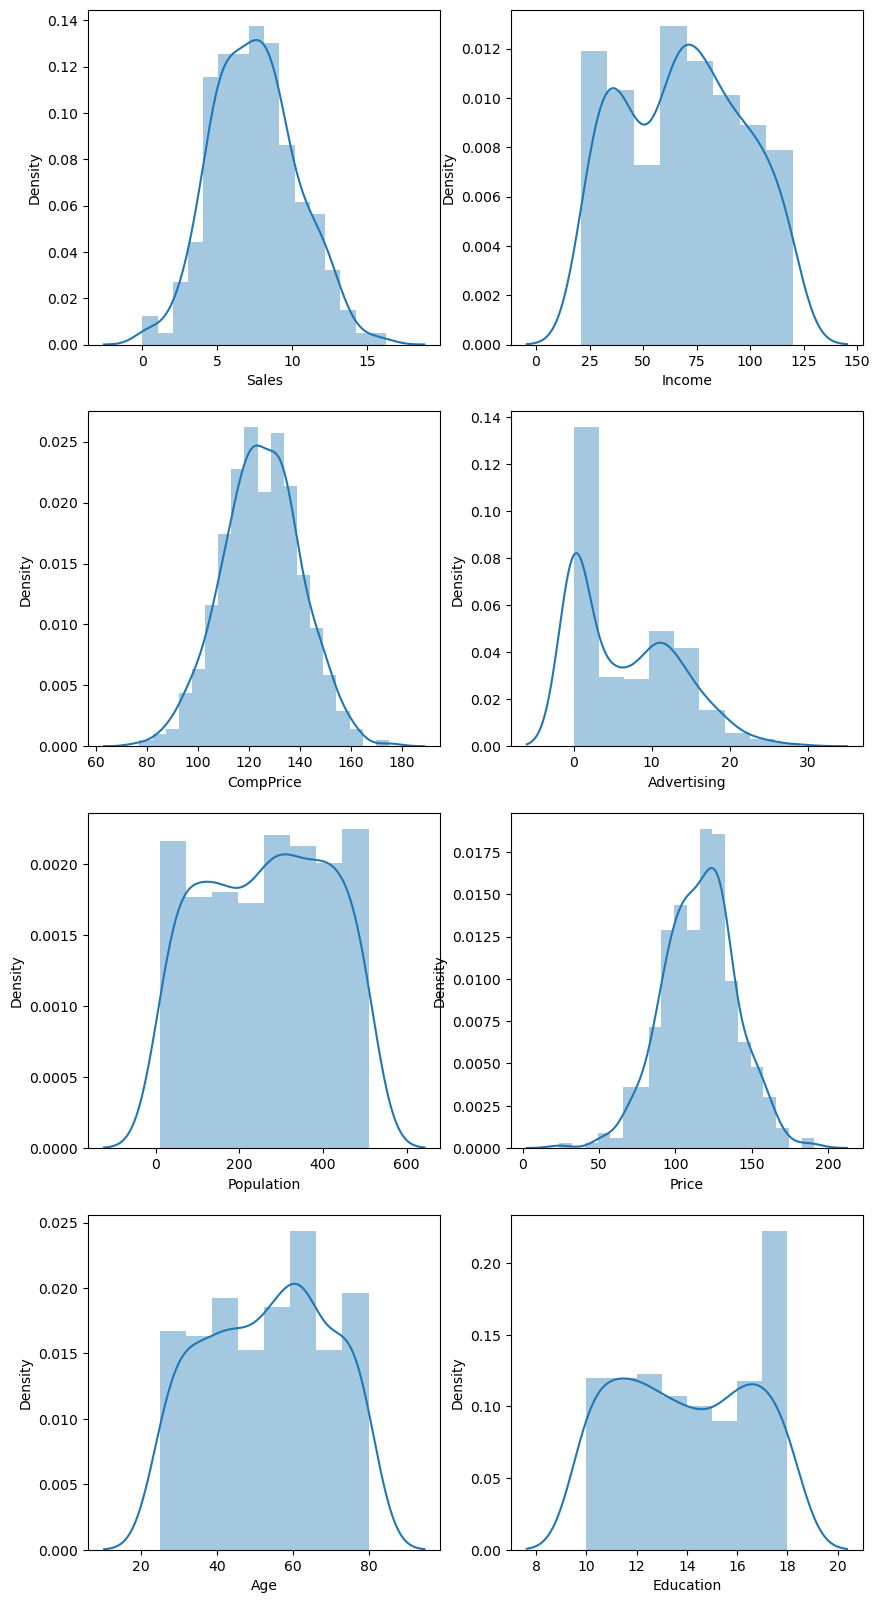

In [7]:
fig,axs=plt.subplots(4,2,figsize=(10,20))
sns.distplot(company_files.Sales,ax=axs[0,0])
sns.distplot(company_files.Income,ax=axs[0,1])
sns.distplot(company_files.CompPrice,ax=axs[1,0])
sns.distplot(company_files.Advertising,ax=axs[1,1])
sns.distplot(company_files.Population,ax=axs[2,0])
sns.distplot(company_files.Price,ax=axs[2,1])
sns.distplot(company_files.Age,ax=axs[3,0])
sns.distplot(company_files.Education,ax=axs[3,1])

### Boxplots of the numerical features in the data

Text(0.5, 1.0, 'Education')

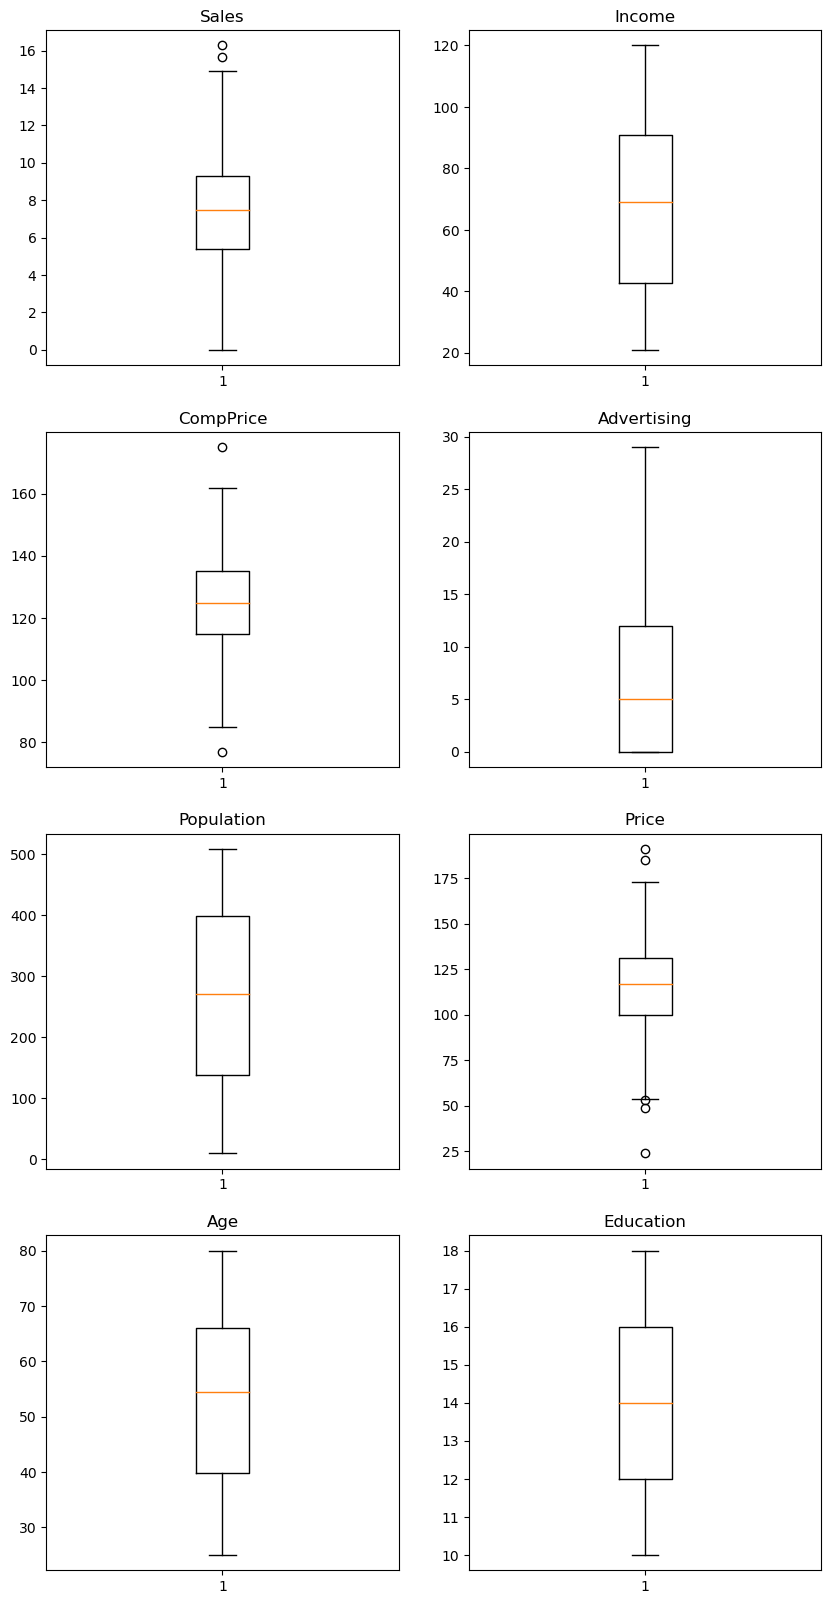

In [8]:
fig,axs=plt.subplots(4,2,figsize=(10,20))
axs[0,0].boxplot(company_files.Sales)
axs[0,1].boxplot(company_files.Income)
axs[1,0].boxplot(company_files.CompPrice)
axs[1,1].boxplot(company_files.Advertising)
axs[2,0].boxplot(company_files.Population)
axs[2,1].boxplot(company_files.Price)
axs[3,0].boxplot(company_files.Age)
axs[3,1].boxplot(company_files.Education)
axs[0,0].set_title("Sales")
axs[0,1].set_title("Income")
axs[1,0].set_title("CompPrice")
axs[1,1].set_title("Advertising")
axs[2,0].set_title("Population")
axs[2,1].set_title("Price")
axs[3,0].set_title("Age")
axs[3,1].set_title("Education")

In [9]:
company_files.ShelveLoc.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [10]:
company_files.Urban.value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [11]:
company_files.US.value_counts()

Yes    258
No     142
Name: US, dtype: int64

### Using label encoder for categorical data

#### shelveloc 
#### bad=0
#### good=1
#### medium=2

#### Urban 
#### no=0
#### yes=1

#### US 
#### no=0
#### yes=1


In [12]:
label_encoder = preprocessing.LabelEncoder()
company_files['ShelveLoc']= label_encoder.fit_transform(company_files['ShelveLoc'])
company_files['Urban']= label_encoder.fit_transform(company_files['Urban'])
company_files['US']= label_encoder.fit_transform(company_files['US'])

In [13]:
company_files

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


### Splitting independant and dependant variables

In [14]:
y=company_files.iloc[:,1]
x=company_files.iloc[:,1:]

In [15]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


### Converting sales column to a categorical data

In [16]:
y

0      138
1      111
2      113
3      117
4      141
      ... 
395    138
396    139
397    162
398    100
399    134
Name: CompPrice, Length: 400, dtype: int64

In [17]:
y=pd.cut(y,bins=4)

In [18]:
y= label_encoder.fit_transform(y)

In [19]:
y

array([2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2,
       2, 1, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 3, 0, 1,
       0, 2, 2, 1, 1, 3, 0, 1, 3, 1, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 1,
       2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1, 2, 2,
       1, 2, 1, 0, 1, 2, 1, 2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 0, 3, 1, 2, 2, 0, 1,
       1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2,
       2, 0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 0, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 2, 1,
       1, 1, 2, 2, 1, 2, 3, 1, 3, 1, 0, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 3, 1, 1, 3, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2,
       1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1,

In [20]:
# building model and doing validation with k fold cross validation

In [21]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators=1000, max_features=5,criterion='entropy')
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.9974999999999999


In [22]:
max_features=[]
accuracy=[]
for i in range(2,9):
    model = RandomForestClassifier(n_estimators=1000, max_features=i,criterion='entropy')
    results = cross_val_score(model, x, y, cv=kfold)
    max_features.append(i)
    accuracy.append(results.mean())
    
print(max_features[accuracy.index(np.max(accuracy))],np.max(accuracy))

8 1.0


In [23]:
### with max_features value of 5 a good accuracy of 99.75% is reached

### Different accuracy vakues for different max_features values

In [24]:
for i in max_features:
    print(i,accuracy[max_features.index(i)])

2 0.9400000000000001
3 0.9875
4 0.9925
5 0.9974999999999999
6 0.9974999999999999
7 0.9974999999999999
8 1.0
